# October 17th, 2021

**Motivation**: Summarize how to start from a blank dir and produce results. <br>

In [1]:
# HIDE CODE


import os
import sys
import nibabel as nib
import networkx as nx
from time import time
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from myterial import orange, blue_grey
from IPython.display import display, IFrame, HTML
from matplotlib.colors import rgb2hex, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

# set style & no interpolalation
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')
%matplotlib inline

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
lfr_dir = pjoin(os.environ['HOME'], 'Documents/workspaces/lfr/binary_overlapping')


# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import make_tree_graph
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.bootstrap import *
from analysis.svinet import *
from analysis.group import *
from analysis.lfr import *
from utils.render import *
from utils.plotting import *
from model.mouse import Mice
from model.configuration import Config

# warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
%%time

mice = Mice((256, 4), full_load=True, load_parcel=True, load_allen=True)

[PROGRESS] 'config.json' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*4

ROI lookup not found, time to run organize func.

combine metadata not found, time to run cat_data() . . .

CPU times: user 7.59 s, sys: 1.46 s, total: 9.05 s
Wall time: 11.3 s


In [3]:
mice.parcel.results

{}

[PROGRESS] fit columnar: initiated

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


[PROGRESS] kmeans fit: done

[PROGRESS] save 2D 10um: done

[PROGRESS] 2d --> 3d: done

[PROGRESS] fill gaps: done

[PROGRESS] save 3D 10um: done

[PROGRESS] downsample: done

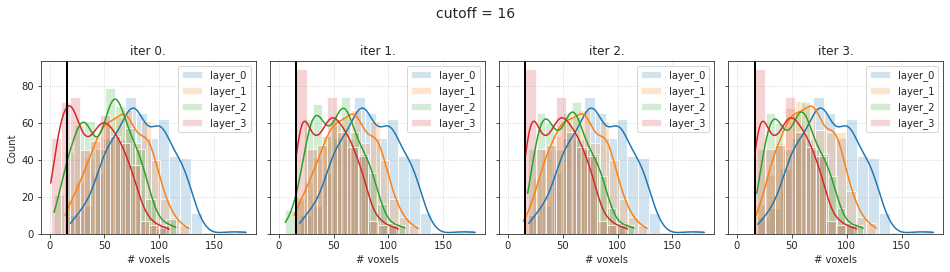

[PROGRESS] merge: done

Warning, region '163' is flat

Warning, region '178' is flat

Warning, region '193' is flat

[PROGRESS] erode: done

num regions,    left: 969,  right: 969
region id diff,         r - l:  Counter({1024: 969})

[PROGRESS] fit columnar: done

[PROGRESS] 'meta_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*4/parcellation

[PROGRESS] 'cortex_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*4/parcellation

[PROGRESS] 'cortex-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*4/parcellation

[PROGRESS] 'cortex-raw_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*4/parcellation

[PROGRESS] 'cortex-eroded_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*4/parcellation

[PROGRESS] 'subcortex_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*4/parcellation

[PROGRESS] 'subcortex-l_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*4/parcellation

[PROGRESS] 'subcortex-r_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*4/parcellation

[PROGRESS] 'cortex-regions_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*4/parcellation

[PROGRESS] 'merged-regions_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*4/parcellation

[PROGRESS] 'top-regions_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*4/parcellation

[PROGRESS] 'merged-ids_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*4/parcellation

[PROGRESS] 'nonzero-idxs_parcel2d-flat_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*4/parcellation

[PROGRESS] 'nonzero-idxs_parcel2d-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*4/parcellation

[PROGRESS] 'nonzero-idxs_parcel3d_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*4/parcellation

[PROGRESS] 'region-idxs_parcel2d-flat_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*4/parcellation

[PROGRESS] 'region-idxs_parcel2d-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*4/parcellation

[PROGRESS] 'region-idxs_parcel3d_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*4/parcellation

[PROGRESS] save results: done.

CPU times: user 4h 45min 5s, sys: 56min 7s, total: 5h 41min 13s
Wall time: 1h 13min 18s


In [4]:
%%time

mice.parcel.fit_parcel(True, cutoff=2)

[PROGRESS] fit columnar: initiated

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


[PROGRESS] kmeans fit: done

[PROGRESS] save 2D 10um: done

[PROGRESS] 2d --> 3d: done

[PROGRESS] fill gaps: done

[PROGRESS] save 3D 10um: done

[PROGRESS] downsample: done

Warning! missing regions:
'[1194, 2730, 3050]'

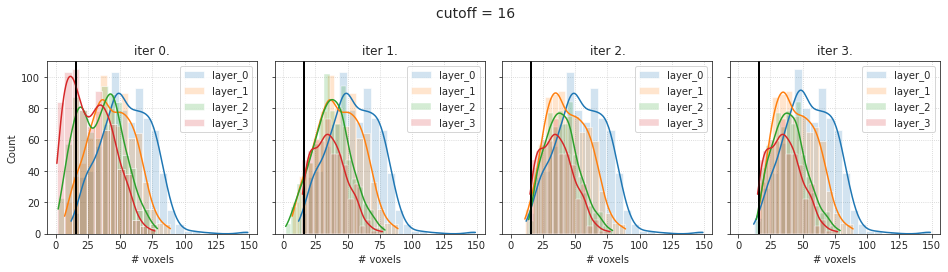

[PROGRESS] merge: done

Warning, region '228' is flat

Warning, region '262' is flat

Warning, region '282' is flat

Warning, region '299' is flat

Warning, region '666' is flat

[PROGRESS] erode: done

num regions,    left: 1367,  right: 1367
region id diff,         r - l:  Counter({1536: 1367})

[PROGRESS] fit columnar: done

[PROGRESS] 'cortex_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-384*4/parcellation

[PROGRESS] 'cortex-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-384*4/parcellation

[PROGRESS] 'cortex-raw_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-384*4/parcellation

[PROGRESS] 'cortex-eroded_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-384*4/parcellation

[PROGRESS] 'subcortex_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-384*4/parcellation

[PROGRESS] 'subcortex-l_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-384*4/parcellation

[PROGRESS] 'subcortex-r_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-384*4/parcellation

[PROGRESS] 'cortex-regions_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-384*4/parcellation

[PROGRESS] 'merged-regions_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-384*4/parcellation

[PROGRESS] 'top-regions_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-384*4/parcellation

[PROGRESS] 'merged-ids_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-384*4/parcellation

[PROGRESS] 'nonzero-idxs_parcel2d-flat_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-384*4/parcellation

[PROGRESS] 'nonzero-idxs_parcel2d-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-384*4/parcellation

[PROGRESS] 'nonzero-idxs_parcel3d_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-384*4/parcellation

[PROGRESS] 'region-idxs_parcel2d-flat_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-384*4/parcellation

[PROGRESS] 'region-idxs_parcel2d-top_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-384*4/parcellation

[PROGRESS] 'region-idxs_parcel3d_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-384*4/parcellation

[PROGRESS] 'meta_100um.npy' saved at
/home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-384*4/parcellation

[PROGRESS] save results: done.

CPU times: user 3h 40min 13s, sys: 35min 59s, total: 4h 16min 12s
Wall time: 25min 6s


In [5]:
from register.register import Register
reg = Register(mice)
reg.register_anat(True)

registering anat sub-SLC10_ses-3: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [27:24<00:00, 54.81s/it]


## How to do this, a complete guide

### Starting steps:

1. Initialize a mice object
```Python
mice = Mice((256, 4), full_load=True, load_allen=True)
```

2. Fit parcellation
```Python
mice.parcel.fit_parcel(force_fit=True, cutoff=2)
```

3. Transform masks from CCF to individual spaces
```Python
from register.register import Register
reg = Register(mice)
reg.register_anat(save_results=True)
```

### Next steps:

1. Copy masks to Yale
```Bash
scp /home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*4/masks/*.nii.gz hv88@spot.med.yale.internal:/data24/mri_group/elake_data_analyses/Hadi_ROIs/indiv3D/
```
2. Run ```./do_xform.sh``` on cuda5
3. Copy resulting 2d masks to _copy directory
```Bash
scp -r hv88@spot.med.yale.internal:/data24/mri_group/elake_data_analyses/Hadi_ROIs /home/hadi/Documents/Ca-fMRI/Yale/_copy/
```

4. Copy masks from _copy directory to the masks_dir
```Bash
find /home/hadi/Documents/Ca-fMRI/Yale/_copy/ -type f -name "*indiv2d*.nii.gz" -exec cp {} /home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*4/masks/ \;
```
```Bash
find /home/hadi/Documents/Ca-fMRI/Yale/_copy/ -type f -name "*-BIS_*.nii.gz" -exec cp {} /home/hadi/Documents/Ca-fMRI/processed/norm-global_parcel-columnar_n-256*4/masks/ \;
```

5. Run this to fix holes in 2D object masks
```Python
mice.parcel.fill_rois_2d()
```

6. Run organize_func (you can do this from terminal, it calls mice.cat_data() as well)
```Bash
./run_register.sh 256 4 0.1
```

### Analysis:

1. Start with Hierarchical (on concatenated Mega Animal)
2. Then run network to save network files.
    - Before this, you can add sampling stuff
    - Remember, now you can pass the entire pattern to loop svinet script (e.g. "p15-sample.txt" vs "p15-sharp.txt")
3. Next, run SVINET and compare various things
4. At some point, you need to complete the placeholder function in Mice
    - This is used to aggregate gam across runs
5. Then, fix bootstrap function and generate Fig. 1.

In [3]:
mice = Mice((256, 2), load_parcel=True, load_allen=True)

ROI lookup not found, time to run organize_func() . . .

combine metadata not found, time to run cat_data() . . .

In [4]:
mice.setup_anat_data()
mice.setup_preproc_data(ca_gsr=False, bold_gsr=True)

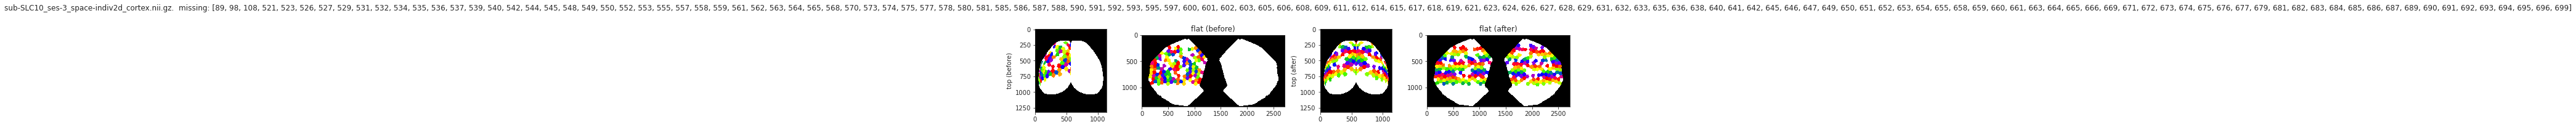

In [5]:
mice.parcel.fill_rois_2d()

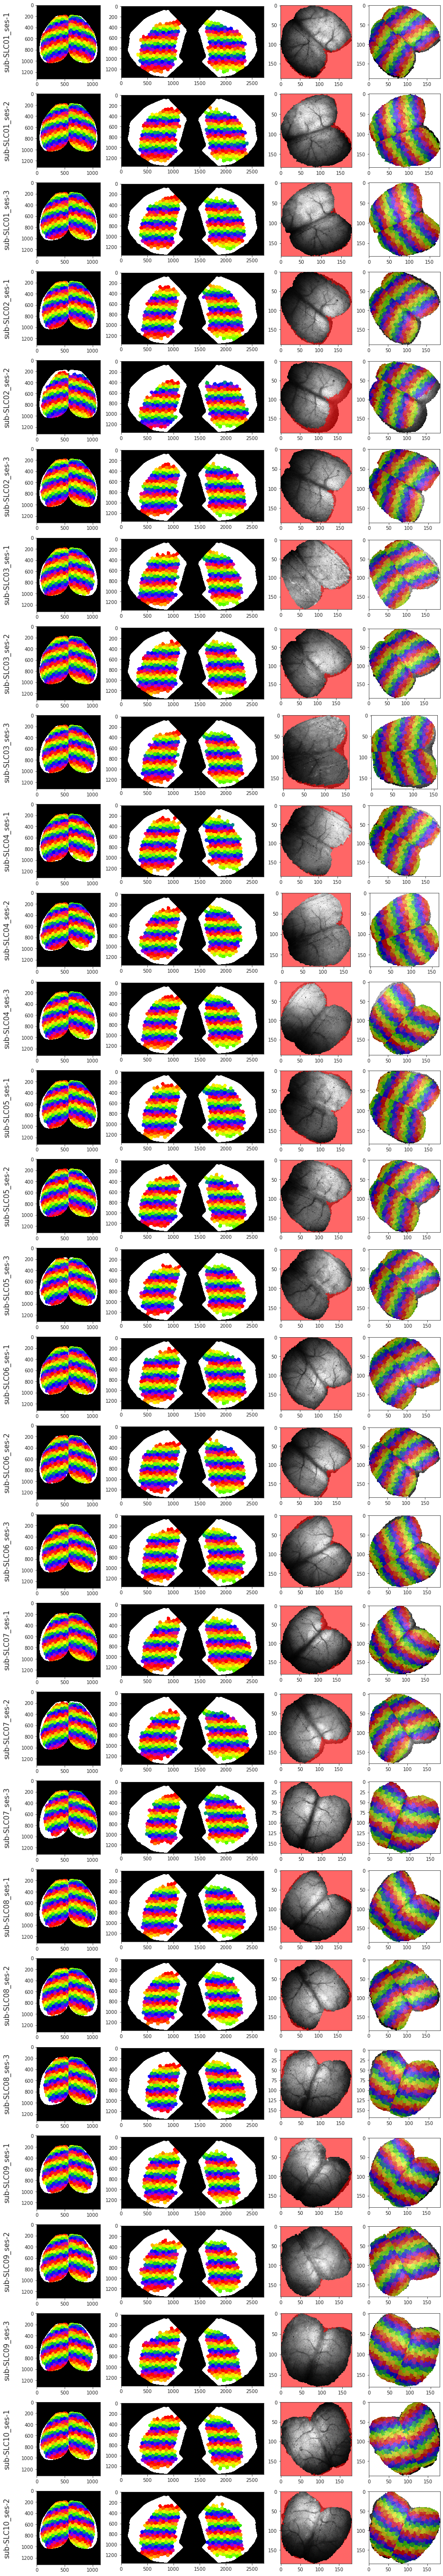

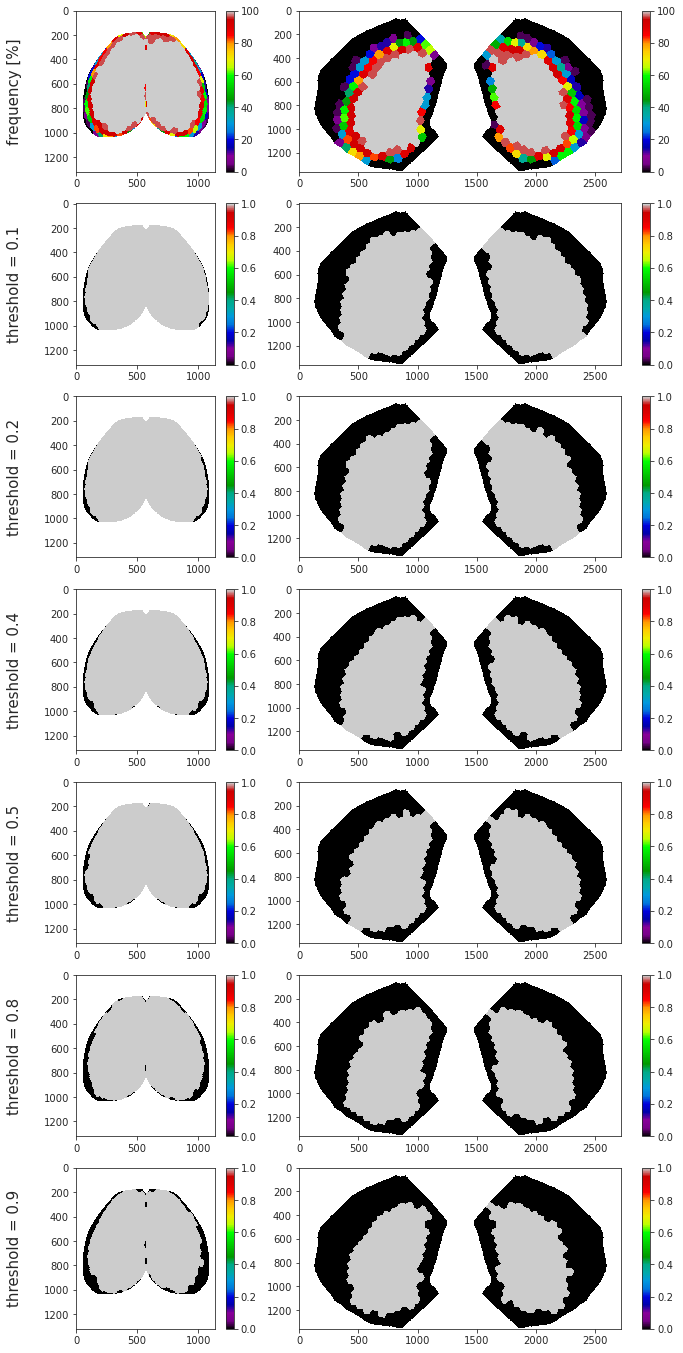

accept ratio: 87 %, reject ratio: 13 %, using a presence threshold of 10.0 %
a total of 326 regions were accepted

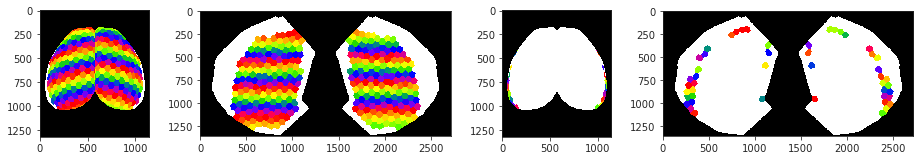

{
    'freq': {
        12: 0.034482758620689655,
        13: 0.0,
        16: 0.06896551724137931,
        17: 0.20689655172413793,
        20: 0.4482758620689655,
        22: 0.13793103448275862,
        23: 0.5862068965517241,
        24: 0.4482758620689655,
        25: 0.6206896551724138,
        27: 0.13793103448275862,
        29: 0.6896551724137931,
        31: 0.896551724137931,
        32: 0.10344827586206896,
        33: 0.6551724137931034,
        34: 0.9655172413793104,
        35: 0.9310344827586207,
        37: 0.896551724137931,
        39: 0.9655172413793104,
        41: 0.20689655172413793,
        42: 0.7931034482758621,
        43: 0.06896551724137931,
        44: 0.9655172413793104,
        45: 1.0,
        48: 1.0,
        49: 1.0,
        50: 0.9655172413793104,
        52: 0.034482758620689655,
        53: 1.0,
        54: 0.3103448275862069,
        55: 0.8620689655172413,
        57: 1.0,
        58: 1.0,
        59: 0.9655172413793104,
        62: 1.0,
        63: 0.0,
        66: 0.034482758620689655,
        67: 1.0,
        68: 0.3103448275862069,
        69: 1.0,
        70: 0.8620689655172413,
        71: 0.896551724137931,
        72: 1.0,
        73: 0.9655172413793104,
        74: 1.0,
        76: 1.0,
        77: 0.0,
        80: 1.0,
        83: 1.0,
        84: 0.20689655172413793,
        85: 0.896551724137931,
        86: 0.9655172413793104,
        87: 1.0,
        88: 1.0,
        89: 1.0,
        90: 1.0,
        93: 1.0,
        94: 0.20689655172413793,
        97: 1.0,
        98: 0.7931034482758621,
        100: 1.0,
        101: 0.06896551724137931,
        102: 1.0,
        103: 1.0,
        104: 1.0,
        105: 1.0,
        107: 1.0,
        108: 0.5862068965517241,
        109: 0.9655172413793104,
        110: 1.0,
        111: 0.034482758620689655,
        112: 1.0,
        114: 1.0,
        116: 0.13793103448275862,
        118: 1.0,
        119: 1.0,
        120: 1.0,
        121: 0.9310344827586207,
        123: 1.0,
        124: 0.41379310344827586,
        125: 1.0,
        126: 1.0,
        127: 1.0,
        130: 0.0,
        131: 1.0,
        132: 1.0,
        134: 1.0,
        135: 0.3103448275862069,
        136: 1.0,
        137: 1.0,
        138: 0.9310344827586207,
        139: 1.0,
        140: 0.0,
        141: 1.0,
        142: 0.4482758620689655,
        143: 1.0,
        146: 1.0,
        147: 1.0,
        148: 1.0,
        149: 0.034482758620689655,
        150: 1.0,
        152: 1.0,
        153: 0.3103448275862069,
        154: 0.0,
        155: 1.0,
        156: 1.0,
        157: 0.9310344827586207,
        158: 1.0,
        159: 1.0,
        160: 1.0,
        161: 0.5862068965517241,
        164: 1.0,
        165: 0.8620689655172413,
        166: 1.0,
        167: 1.0,
        169: 0.034482758620689655,
        170: 1.0,
        171: 1.0,
        172: 0.0,
        173: 1.0,
        174: 0.9310344827586207,
        175: 1.0,
        176: 1.0,
        177: 1.0,
        180: 0.6206896551724138,
        181: 1.0,
        182: 1.0,
        183: 0.9655172413793104,
        184: 1.0,
        185: 1.0,
        186: 0.06896551724137931,
        187: 1.0,
        188: 0.0,
        189: 0.9310344827586207,
        190: 1.0,
        191: 1.0,
        192: 1.0,
        193: 0.0,
        195: 1.0,
        196: 0.5172413793103449,
        197: 1.0,
        198: 1.0,
        199: 1.0,
        200: 0.034482758620689655,
        201: 0.6896551724137931,
        202: 1.0,
        203: 1.0,
        204: 0.0,
        205: 0.896551724137931,
        207: 1.0,
        208: 1.0,
        209: 1.0,
        210: 0.3103448275862069,
        211: 1.0,
        213: 1.0,
        214: 0.9310344827586207,
        215: 1.0,
        216: 0.0,
        217: 0.5172413793103449,
        218: 1.0,
        219: 1.0,
        220: 0.8275862068965517,
        221: 1.0,
        223: 0.9655172413793104,
        224: 1.0,
        225: 1.0,
        226: 0.06896551724137931,
        227: 1.0,
        2

In [6]:
mice.parcel.show_accepted_regions_2d(mice, 0.1)